<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


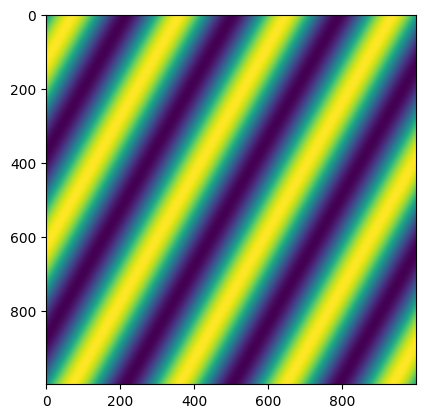

In [30]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.pi/6                 # Angulo de inclinacion de la rejilla
x = np.linspace(0, 1000,1000)   # Arreglo de numeros para los ejes x e y
X, Y = np.meshgrid(x, x)        # Rerpesentacin en "2D" de los ejes
wavelength = 250                # Longitud de onda de la señal senoidal creada

# Sinusoidal Grating
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle))/wavelength)

# Figura
plt.imshow(grating)
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


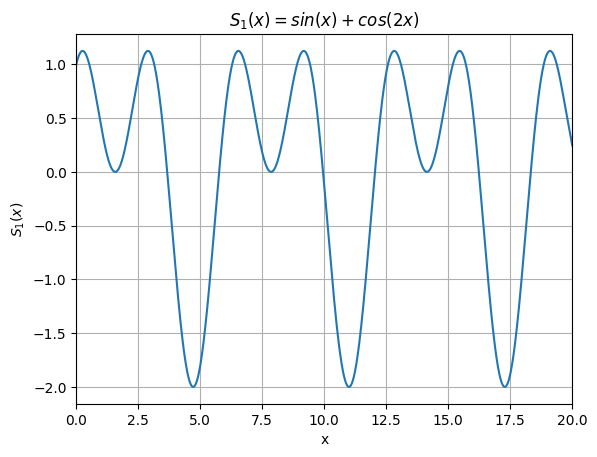

In [31]:

fs = 50                                 # Frecuencia de muestreo
n0 = 0                                  # Valor inicial del vector de muestras
nf = 20                                 # Valor final del vector de muestras
x = np.linspace(n0,nf,(nf-n0)*fs)       # Vector de muestras

s1 = np.sin(x)+np.cos(2*x)              # Señal S1(x)

# Figuras
plt.plot(x,s1)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{1}(x)$')
plt.title(r'$S_{1}(x) = sin(x) + cos(2x)$')
plt.show()


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

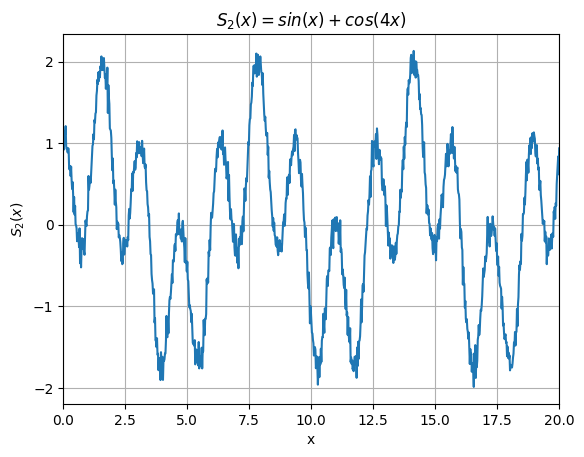

In [32]:
# Señal s2(t)
s2 = np.sin(x) + np.cos(4*x)

media = 0
std_dev = 0.1

ruido = np.random.normal(media, std_dev, len(s2))

s2_noise = s2 + ruido


plt.plot(x,s2_noise)
plt.xlim([n0,nf])
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$S_{2}(x)$')
plt.title(r'$S_{2}(x) = sin(x) + cos(4x)$')
plt.show()


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


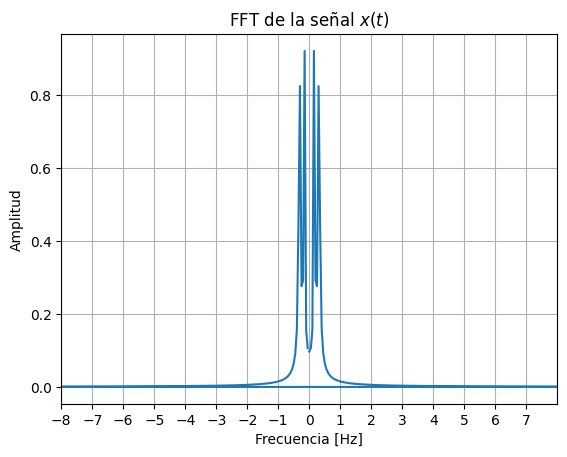

In [38]:
from scipy.fft import fft, fftfreq

# FFT de la señal
S1 = fft(s1)
S2 = fft(s2_noise)

# Obtencion de las frecuencias para graficar
freqs = fftfreq((nf-n0)*fs, nf/((nf-n0)*fs))

# Graficos
plt.plot(freqs, 2.0/((nf-n0)*fs) * np.abs(S1))#,linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlim(-8,8)
plt.xticks(np.arange(-8,8,step=1))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title(r'FFT de la señal $x(t)$')
plt.grid()
plt.show()

### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html